In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from patsy.util import widen

In [2]:
data_path = '/Users/jk1/Library/CloudStorage/OneDrive-unige.ch/stroke_research/geneva_stroke_incidence/data/mrs_per_category.xlsx'

In [3]:
df = pd.read_excel(data_path)

In [4]:
df.shape

(7, 8)

In [5]:
dft = df.T
# remove first row
dft = dft.iloc[1:, :]

In [6]:
hex_colors = ['#dfe9f5', '#bfd3eb', '#8ec0e3', '#0093c9', '#2a7aaf', '#1e558e', '#153659']
palette = sns.color_palette(hex_colors)

In [7]:
palette

[(0.8745098039215686, 0.9137254901960784, 0.9607843137254902),
 (0.7490196078431373, 0.8274509803921568, 0.9215686274509803),
 (0.5568627450980392, 0.7529411764705882, 0.8901960784313725),
 (0.0, 0.5764705882352941, 0.788235294117647),
 (0.16470588235294117, 0.47843137254901963, 0.6862745098039216),
 (0.11764705882352941, 0.3333333333333333, 0.5568627450980392),
 (0.08235294117647059, 0.21176470588235294, 0.34901960784313724)]

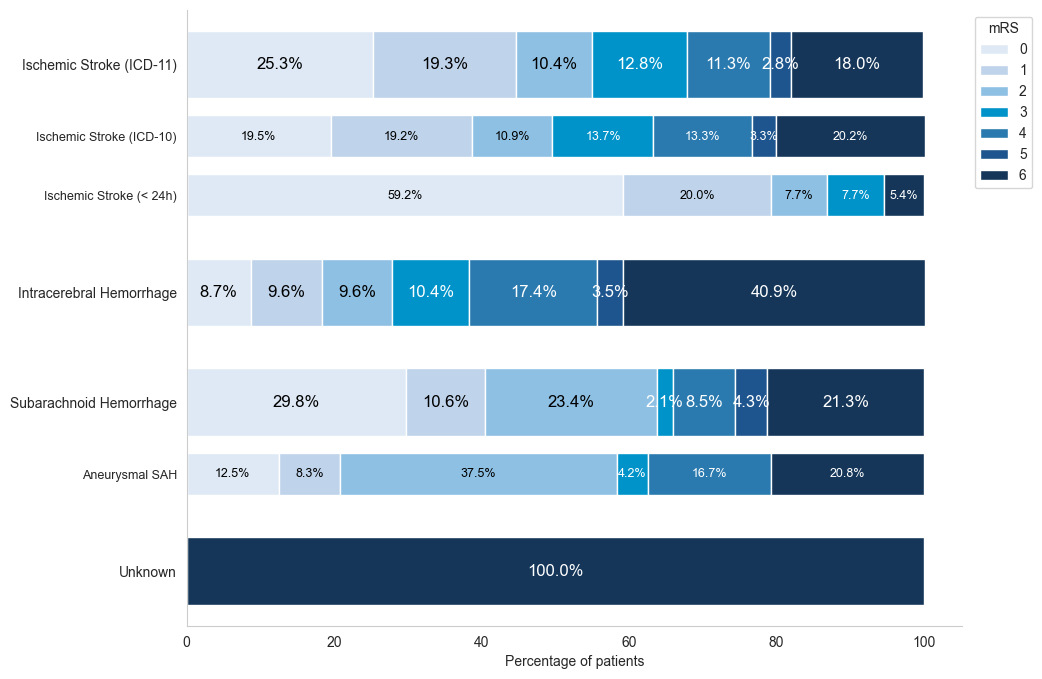

In [8]:
plot_text_labels = True

main_bar_width = 0.8
small_bar_width = 0.5
small_bar_tick_fontsize = 9

fig, ax = plt.subplots(figsize = (10, 8))
# Plot
dft.plot.barh(stacked = True,
            ax = ax,
            # color = sns.color_palette("Blues", 7),
            color = palette,
            width = main_bar_width)  

# reduce height of selected bars
for i in range(len(ax.patches)):
    if i % 7 in [1, 4, 5]:
        ax.patches[i].set_height(small_bar_width)
        # move higher by 0.1
        ax.patches[i].set_y(ax.patches[i].get_y() + 0.15)
        
# set y for each bar
for i in range(len(ax.patches)):
    if i % 7 == 0:
        ax.patches[i].set_y(0 - main_bar_width/2)
    elif i % 7 == 1:
        ax.patches[i].set_y(1 - small_bar_width/2 + 0.15)
    elif i % 7 == 2:
        ax.patches[i].set_y(2 - main_bar_width/2)
    elif i % 7 == 3:
        ax.patches[i].set_y(3 - main_bar_width/2 + 0.3)
    elif i % 7 == 4:
        ax.patches[i].set_y(4 - small_bar_width/2 + 0.45)
    elif i % 7 == 5:
        ax.patches[i].set_y(5 - small_bar_width/2 + 0.15)
    elif i % 7 == 6:
        ax.patches[i].set_y(6 - main_bar_width/2)
        
# set y ticks
yticks_labels = ax.get_yticklabels()
ax.set_yticks([ax.patches[0].get_y() + main_bar_width/2,
               ax.patches[1].get_y() + small_bar_width/2,
                ax.patches[2].get_y() + main_bar_width/2,
                ax.patches[3].get_y() + main_bar_width/2,
                ax.patches[4].get_y() + small_bar_width/2,
                ax.patches[5].get_y() + small_bar_width/2,
                ax.patches[6].get_y() + main_bar_width/2],
                )
ax.set_yticklabels(yticks_labels)

# for small bars, set y tick labels to small font
for i in range(len(yticks_labels)):
    if i in [1, 4, 5]:
        yticks_labels[i].set_fontsize(small_bar_tick_fontsize)
    
# set legend position to right to graph
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), title = 'mRS')

# turn off grid
ax.grid(False)
# turn off upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Percentage of patients')


if plot_text_labels:
    # Add percentage labels
    for i in range(len(ax.patches)):
        if i % 7 in [1, 4, 5]:
            font_size = small_bar_tick_fontsize
        else:
            font_size = 12
        
        # if > 0
        if ax.patches[i].get_width() > 0:
            text_color = 'white'
            # if mrs < 4, text_color = 'black'
            if i < 3*7:
                text_color = 'black'
            # # if 0- 5%, set text label as vertical
            # if ax.patches[i].get_width() < 5:
            #     ax.text(ax.patches[i].get_width() / 2 + ax.patches[i].get_x(),
            #             ax.patches[i].get_y() + ax.patches[i].get_height() / 2,
            #             f'{ax.patches[i].get_width():.1f}%',
            #             ha = 'center', va = 'center', color = 'black', rotation='vertical')
            # else:
            ax.text(ax.patches[i].get_width() / 2 + ax.patches[i].get_x(),
                    ax.patches[i].get_y() + ax.patches[i].get_height() / 2,
                    f'{ax.patches[i].get_width():.1f}%',
                    ha = 'center', va = 'center', color = text_color, fontsize = font_size)
                                                

plt.show()




In [12]:
# fig.savefig('/Users/jk1/Downloads/mrs_distribution.pdf', bbox_inches='tight', dpi = 600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
